# Complete Exploratory Data Analysis

## Georgia Tech MSA Spring 2026 Practicum

This is where your full EDA goes. We look forward to digging deeper into your analysis here.

Read the [eda_outline.md](eda_outline.md) for more details.

## Inital EDA
The research question that this project started with was: How do market odds shift after goals and how does these shifts compare to the statistical impact of the events.

Unfortunately, after extensive exploration and data integrity checks, I concluded that the datasets are not sufficient to support a comprehensive analysis of this question. Nevertheless, the EDA is significant and parts of it are highlighted below.

In [1]:
from pathlib import Path
import polars as pl

polymarket_directory = Path("../data/Polymarket")
statsbomb_directory = Path("../data/Statsbomb")


In [2]:
def load_matches():
    # Load match data from Statsbomb.
    matches = pl.read_parquet(statsbomb_directory / "matches.parquet")

    # Calculate the UTC kickoff time for later alignment with Polymarket data
    matches = matches.with_columns(
        pl.format("{} {}", pl.col("match_date"), pl.col("kickoff"))
        .str.to_datetime("%Y-%m-%d %H:%M:%S")
        .alias("kickoff_utc")
    )

    return matches

matches = load_matches()

print(f"Total Matches Loaded: {len(matches)}")
with pl.Config(tbl_cols=-1):
    print(matches.head())

Total Matches Loaded: 3464
shape: (5, 37)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ mat ┆ mat ┆ mat ┆ mat ┆ mat ┆ kic ┆ hom ┆ awa ┆ com ┆ com ┆ com ┆ sea ┆ sea ┆ hom ┆ hom ┆ hom ┆ awa ┆ awa ┆ awa ┆ sta ┆ sta ┆ ref ┆ ref ┆ las ┆ las ┆ dat ┆ sho ┆ xy_ ┆ com ┆ gen ┆ is_ ┆ is_ ┆ cou ┆ sea ┆ mat ┆ mat ┆ kic │
│ ch_ ┆ ch_ ┆ ch_ ┆ ch_ ┆ ch_ ┆ kof ┆ e_s ┆ y_s ┆ pet ┆ pet ┆ pet ┆ son ┆ son ┆ e_t ┆ e_t ┆ e_m ┆ y_t ┆ y_t ┆ y_m ┆ diu ┆ diu ┆ ere ┆ ere ┆ t_u ┆ t_u ┆ a_v ┆ t_f ┆ fid ┆ pet ┆ der ┆ you ┆ int ┆ ntr ┆ son ┆ ch_ ┆ ch_ ┆ kof │
│ id  ┆ dat ┆ wee ┆ sta ┆ sta ┆ f   ┆ cor ┆ cor ┆ iti ┆ iti ┆ iti ┆ _id ┆ --- ┆ eam ┆ eam ┆ ana ┆ eam ┆ eam ┆ ana ┆ m_i ┆ m   ┆ e_i ┆ e   ┆ pda ┆ pda ┆ ers ┆ ide ┆ eli ┆ iti ┆ --- ┆ th  ┆ ern ┆ y_n ┆ _na ┆ upd ┆ ava ┆ f_u │
│ --- ┆ e   ┆ k   ┆ tus ┆ tus ┆ --- ┆ e   ┆ e   ┆ on_ ┆ on  ┆ 

In [3]:
def events_to_utc(matches_df):
    # Use kickoff time to convert event timestamps to UTC
    events = pl.read_parquet(statsbomb_directory / "events.parquet")

    events = events.join(matches_df, on="match_id", how="left").with_columns(
        (pl.col("kickoff_utc") + pl.duration(minutes="minute", seconds="second")).alias("event_time_utc")
    )

    return events

events = events_to_utc(matches)

In [4]:
with pl.Config(tbl_cols=-1):
    print(events[0,:])

shape: (1, 149)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ id  ┆ ind ┆ per ┆ min ┆ sec ┆ tim ┆ dur ┆ loc ┆ loc ┆ pos ┆ pos ┆ pos ┆ out ┆ off ┆ co

In [5]:
# Explore documented event types
with pl.Config(tbl_rows=-1):
    print(events.select("type").unique())

shape: (35, 1)
┌───────────────────┐
│ type              │
│ ---               │
│ str               │
╞═══════════════════╡
│ Shield            │
│ Referee Ball-Drop │
│ Half Start        │
│ Substitution      │
│ Dribbled Past     │
│ Camera off        │
│ Offside           │
│ Foul Won          │
│ Injury Stoppage   │
│ Own Goal Against  │
│ Shot              │
│ Interception      │
│ Carry             │
│ Starting XI       │
│ Miscontrol        │
│ Half End          │
│ Error             │
│ Dribble           │
│ Ball Receipt*     │
│ Pass              │
│ Goal Keeper       │
│ Pressure          │
│ Player Off        │
│ Bad Behaviour     │
│ Block             │
│ Duel              │
│ Tactical Shift    │
│ Ball Recovery     │
│ Dispossessed      │
│ Player On         │
│ Clearance         │
│ 50/50             │
│ Own Goal For      │
│ Camera On         │
│ Foul Committed    │
└───────────────────┘


In [6]:
# Explore documented shot outcomes
with pl.Config(tbl_rows=-1):
    print(events.select("shot_outcome").unique())

shape: (9, 1)
┌──────────────────┐
│ shot_outcome     │
│ ---              │
│ str              │
╞══════════════════╡
│ Saved Off Target │
│ Blocked          │
│ null             │
│ Goal             │
│ Off T            │
│ Saved to Post    │
│ Wayward          │
│ Post             │
│ Saved            │
└──────────────────┘


In [7]:
# Filter for goal events and select relevant columns
goals = events.filter((pl.col("type") == "Shot") & (pl.col("shot_outcome") == "Goal")).select(["match_id", "team", "shot_statsbomb_xg", "home_team", "away_team", "event_time_utc"])

print(goals.head())

shape: (5, 6)
┌──────────┬───────────┬───────────────────┬─────────────────┬──────────────────┬──────────────────┐
│ match_id ┆ team      ┆ shot_statsbomb_xg ┆ home_team       ┆ away_team        ┆ event_time_utc   │
│ ---      ┆ ---       ┆ ---               ┆ ---             ┆ ---              ┆ ---              │
│ i32      ┆ str       ┆ f32               ┆ str             ┆ str              ┆ datetime[μs]     │
╞══════════╪═══════════╪═══════════════════╪═════════════════╪══════════════════╪══════════════════╡
│ 15946    ┆ Barcelona ┆ 0.083203          ┆ Barcelona       ┆ Deportivo Alavés ┆ 2018-08-18       │
│          ┆           ┆                   ┆                 ┆                  ┆ 23:18:12         │
│ 15946    ┆ Barcelona ┆ 0.105343          ┆ Barcelona       ┆ Deportivo Alavés ┆ 2018-08-18       │
│          ┆           ┆                   ┆                 ┆                  ┆ 23:37:41         │
│ 15946    ┆ Barcelona ┆ 0.420624          ┆ Barcelona       ┆ Deportivo Alav

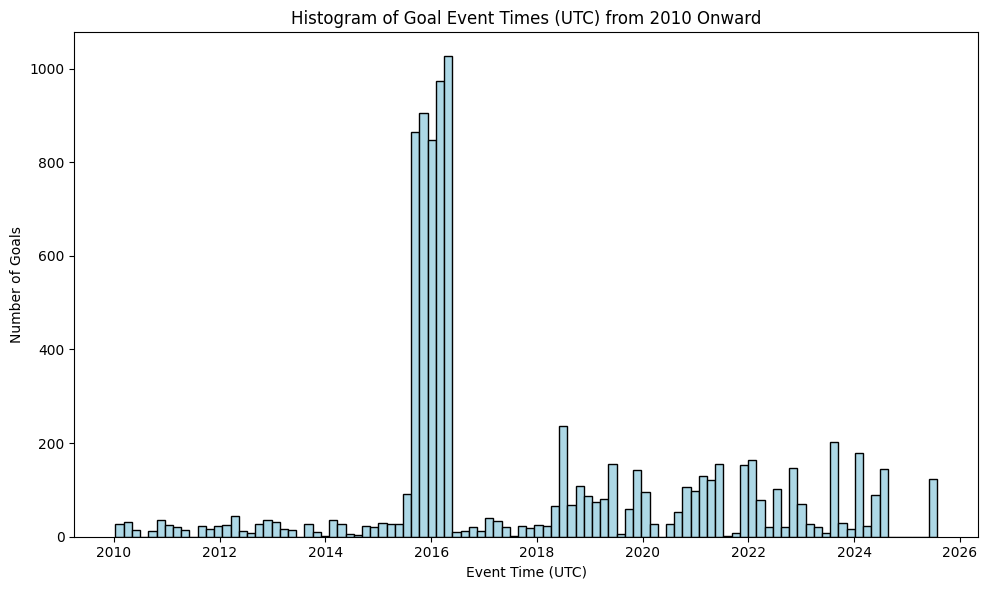

In [8]:
# Plot a histogram of goal event times (UTC) to visualize density of data across the timeline

import matplotlib.pyplot as plt

goals_2010 = goals.filter(pl.col("event_time_utc") >= pl.datetime(2010, 1, 1))

event_times = goals_2010["event_time_utc"].to_pandas()

plt.figure(figsize=(10, 6))
plt.hist(event_times, bins=100, color='lightblue', edgecolor='black')
plt.xlabel('Event Time (UTC)')
plt.ylabel('Number of Goals')
plt.title('Histogram of Goal Event Times (UTC) from 2010 Onward')
plt.tight_layout()
plt.show()

In [9]:
def load_red_cards():
    lineups = pl.read_parquet(statsbomb_directory / "lineups.parquet") # Get lineups data where red card info is stored

    red_cards = lineups.filter(pl.col("card_type") == "Red Card") # Filter for red cards only
    red_cards = red_cards.join(matches, on="match_id", how="left") # Join with matches to get kickoff time

    # Filter out rows where to_time is null where there is missing time info 
    red_cards = red_cards.filter(pl.col("to_time").is_not_null())

    # Split time into minutes and seconds to avoid errors with soccer match clock structure (no hours)
    red_cards = red_cards.with_columns(
        pl.col("to_time").str.split_exact(":", 1).alias("time_split")
    ).with_columns([
        pl.col("time_split").struct.field("field_0").cast(pl.Int64).alias("minutes"),
        pl.col("time_split").struct.field("field_1").cast(pl.Int64).alias("seconds")
    ])

    # Calculate red card time in UTC by adding minutes and seconds to kickoff time
    red_cards = red_cards.with_columns(
        (pl.col("kickoff_utc") + 
         pl.duration(minutes=pl.col("minutes"), seconds=pl.col("seconds"))
        ).alias("event_time_utc")
    )

    # Keep last record for each player to capture correct send off time
    red_cards = (red_cards.sort("event_time_utc").unique(subset=["match_id", "player_name"], keep="last")) 
    
    return red_cards.unique(subset=["match_id", "player_name"], keep="last").select([
    "match_id", 
    "team_name",     
    "home_team",    
    "away_team",     
    "player_name", 
    "event_time_utc"
])

red_cards = load_red_cards()

In [10]:
print(red_cards.head())

shape: (5, 6)
┌──────────┬───────────┬───────────────┬───────────────┬──────────────────┬─────────────────────┐
│ match_id ┆ team_name ┆ home_team     ┆ away_team     ┆ player_name      ┆ event_time_utc      │
│ ---      ┆ ---       ┆ ---           ┆ ---           ┆ ---              ┆ ---                 │
│ i32      ┆ str       ┆ str           ┆ str           ┆ str              ┆ datetime[μs]        │
╞══════════╪═══════════╪═══════════════╪═══════════════╪══════════════════╪═════════════════════╡
│ 3901183  ┆ Troyes    ┆ Troyes        ┆ Paris         ┆ Lossémy Karaboué ┆ 2016-03-13 16:15:15 │
│          ┆           ┆               ┆ Saint-Germain ┆                  ┆                     │
│ 303473   ┆ Barcelona ┆ Barcelona     ┆ Sevilla       ┆ Ronald Federico  ┆ 2019-10-06 22:30:47 │
│          ┆           ┆               ┆               ┆ Araújo da Silv…  ┆                     │
│ 3754059  ┆ Chelsea   ┆ West Bromwich ┆ Chelsea       ┆ John Terry       ┆ 2015-08-23 15:30:58 │
│     

In [11]:
# Understand red cards data and check for any issues with time conversion
# This was used to correct the load_red_cards function after discovering some red card times were off when validating against ESPN match report data. 
# Some red cards had null to_time values causing errors
# By filtering out rows with null to_time and keeping the last record for each player, the correct send off time for all red cards is captured.
# Validated against ESPN match report 

lineups = pl.read_parquet(statsbomb_directory / "lineups.parquet") # Get lineups data

with pl.Config(tbl_cols=-1):
	print(lineups.filter(
		(pl.col("card_type") == "Red Card") & (pl.col("match_id") == 3754007)
	))

shape: (6, 17)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ mat ┆ tea ┆ pla ┆ pla ┆ pla ┆ jer ┆ cou ┆ cou ┆ tea ┆ pos ┆ fro ┆ to_ ┆ fro ┆ to_ ┆ car ┆ car ┆ car │
│ ch_ ┆ m_i ┆ yer ┆ yer ┆ yer ┆ sey ┆ ntr ┆ ntr ┆ m_n ┆ iti ┆ m_t ┆ tim ┆ m_p ┆ per ┆ d_t ┆ d_t ┆ d_r │
│ id  ┆ d   ┆ _id ┆ _na ┆ _ni ┆ _nu ┆ y_i ┆ y_n ┆ ame ┆ on_ ┆ ime ┆ e   ┆ eri ┆ iod ┆ ime ┆ ype ┆ eas │
│ --- ┆ --- ┆ --- ┆ me  ┆ ckn ┆ mbe ┆ d   ┆ ame ┆ --- ┆ nam ┆ --- ┆ --- ┆ od  ┆ --- ┆ --- ┆ --- ┆ on  │
│ i32 ┆ i32 ┆ i32 ┆ --- ┆ ame ┆ r   ┆ --- ┆ --- ┆ str ┆ e   ┆ str ┆ str ┆ --- ┆ i32 ┆ str ┆ str ┆ --- │
│     ┆     ┆     ┆ str ┆ --- ┆ --- ┆ i32 ┆ str ┆     ┆ --- ┆     ┆     ┆ i32 ┆     ┆     ┆     ┆ str │
│     ┆     ┆     ┆     ┆ str ┆ i32 ┆     ┆     ┆     ┆ str ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╡
│ 375 ┆ 30  ┆ 363 ┆ Cha ┆ nul ┆ 16  ┆ 201 ┆ Sco ┆

In [12]:
# Load odds history data from Polymarket and convert timestamps to datetime format

def load_all_odds():
    return (
        pl.scan_parquet(polymarket_directory / "soccer_odds_history.parquet")
        .with_columns(pl.col("timestamp").cast(pl.Int64).cast(pl.Datetime("ms")))
        .collect()
    )

odds_history = load_all_odds()
markets = pl.read_parquet(polymarket_directory / "soccer_markets.parquet")
tokens = pl.read_parquet(polymarket_directory / "soccer_tokens.parquet")

In [13]:
with pl.Config(tbl_cols=-1, tbl_rows=-1):
    print(markets.head(20))

shape: (20, 10)
┌──────────┬─────────┬─────────┬─────────┬─────────┬─────────┬────────┬────────┬─────────┬─────────┐
│ market_i ┆ questio ┆ slug    ┆ event_s ┆ categor ┆ volume  ┆ active ┆ closed ┆ created ┆ end_dat │
│ d        ┆ n       ┆ ---     ┆ lug     ┆ y       ┆ ---     ┆ ---    ┆ ---    ┆ _at     ┆ e       │
│ ---      ┆ ---     ┆ str     ┆ ---     ┆ ---     ┆ f64     ┆ bool   ┆ bool   ┆ ---     ┆ ---     │
│ str      ┆ str     ┆         ┆ str     ┆ str     ┆         ┆        ┆        ┆ datetim ┆ datetim │
│          ┆         ┆         ┆         ┆         ┆         ┆        ┆        ┆ e[μs]   ┆ e[μs]   │
╞══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════╪════════╪═════════╪═════════╡
│ 242920   ┆ Will    ┆ will-uk ┆ will-uk ┆ Sports  ┆ 4766.88 ┆ true   ┆ true   ┆ 2022-04 ┆ 2022-06 │
│          ┆ Ukraine ┆ raine-q ┆ raine-q ┆         ┆         ┆        ┆        ┆ -06 07: ┆ -30 00: │
│          ┆ qualify ┆ ualify- ┆ ualify- ┆         ┆         ┆        ┆    

In [14]:
# Evaluate how to identify relevant markets for alignment with Statsbomb data

count_vs = markets.filter(pl.col("question").str.contains("vs\.")).height
print(f'Number of rows with "vs.": {count_vs}')

Number of rows with "vs.": 2688


In [15]:
# Create a mapping of market questions to their actual outcomes
question_outcome_mapping = (
    markets.select(["market_id", "question"])
    .join(tokens, on="market_id", how="left")
    .group_by(["market_id", "question"])
    .agg([pl.col("outcome").unique()])
)

print(question_outcome_mapping)

shape: (8_549, 3)
┌───────────┬─────────────────────────────────┬──────────────────────────────┐
│ market_id ┆ question                        ┆ outcome                      │
│ ---       ┆ ---                             ┆ ---                          │
│ str       ┆ str                             ┆ list[str]                    │
╞═══════════╪═════════════════════════════════╪══════════════════════════════╡
│ 682852    ┆ Spread: FK Crvena zvezda (-1.5… ┆ ["FK Crvena zvezda", "FCSB"] │
│ 575442    ┆ Will DJ Moore record the most … ┆ ["Yes", "No"]                │
│ 542254    ┆ Will Manchester City win on 20… ┆ ["Yes", "No"]                │
│ 575322    ┆ Will Jayden Daniels record the… ┆ ["Yes", "No"]                │
│ 564361    ┆ MLS: Will New England Revoluti… ┆ ["Yes", "No"]                │
│ …         ┆ …                               ┆ …                            │
│ 508584    ┆ Will Aston Villa beat Manchest… ┆ ["Yes", "No"]                │
│ 662671    ┆ Will Montreuil FC wi

As the notes for the project indicate, a mapping between StatsBomb match IDs and Polymarket market IDs is needed to align the datasets for analysis. This mapping can be created by matching the team names and event times from the StatsBomb data with the market questions and timestamps from the Polymarket data.

In [16]:
# Extract unique team names from StatsBomb matches data
statsbomb_teams = pl.concat([matches.select(pl.col("home_team").alias("team")), matches.select(pl.col("away_team").alias("team"))]).unique()
statsbomb_teams = sorted(statsbomb_teams["team"].to_list())

print("StatsBomb Teams: " + str(len(statsbomb_teams)))
for team in statsbomb_teams:
    print(team)

StatsBomb Teams: 308
AC Ajaccio
AC Milan
AFC Bournemouth
AS Monaco
AS Roma
ATK Mohun Bagan
Ajax
Albacete
Albania
Algeria
Almería
Angers
Angola
Argentina
Argentina U20
Argentina Women's
Arsenal
Arsenal WFC
Aston Villa
Atalanta
Athletic Club
Atlético Madrid
Augsburg
Australia
Australia Women's
Austria
Austria Women's
Auxerre
Barcelona
Bastia
Bayer Leverkusen
Bayern Munich
Belgium
Belgium Women's
Bengaluru
Birmingham City
Birmingham City WFC
Blackburn Rovers
Boca Juniors
Bochum
Bolivia
Bologna
Bolton Wanderers
Bordeaux
Borussia Dortmund
Borussia Mönchengladbach
Brazil
Brazil Women's
Brighton & Hove Albion WFC
Bristol City WFC
Burkina Faso
CD Numancia de Soria
Caen
Cameroon
Cameroon Women's
Canada
Canada Women's
Cape Verde Islands
Carpi
Celta Vigo
Charlotte
Charlton Athletic
Chelsea
Chelsea FCW
Chennaiyin
Chicago Red Stars
Chievo
Chile
Chile Women's
China PR Women's
Cincinnati
Clermont Foot
Colombia
Colombia Women's
Congo DR
Costa Rica
Costa Rica Women's
Croatia
Crystal Palace
Czech Republ

In [17]:
# Extract unique outcomes from Polymarket tokens data and filter for team names while excluding non-team outcomes like "Draw", "Over/Under", and "Yes/No"
tokens_lf = pl.scan_parquet(polymarket_directory / "soccer_tokens.parquet")
polymarket_outcomes = (
    tokens_lf.select("outcome")
    .unique()
    .collect()
    .sort("outcome")
)

exclude_regex = r"-other-|\+0\.5|-0\.5|Draw|Under|Over|\+1\.5|-1\.5|Yes|No|Odd|Even"
polymarket_outcomes = polymarket_outcomes.filter(~pl.col("outcome").str.contains(exclude_regex)).with_columns(
    pl.col("outcome").str.strip_chars().alias("outcome"))

print("Polymarket Teams: " + str(len(polymarket_outcomes)))
for outcome in polymarket_outcomes["outcome"].to_list():
    print(outcome)

Polymarket Teams: 368
Eintracht Frankfurt
PSG
Rangers
AC Milan
AFC Ajax
AFC Bournemouth
AJ Auxerre
ARS
AS Monaco FC
AS Roma
AVL
AZ Alkmaar
Achane
Ajax
Ajax Amsterdam
Al Hilal
Al Hilal
Allen
America
Anderlecht
Angers SCO
Anisimova
Argentina
Arizona
Arkansas
Arsenal
Arsenal FC
Aston Villa
Aston Villa FC
Atalanta
Atalanta BC
Athletic Bilbao
Athletic Club
Atlanta
Atlas
Atletico
Atletico Madrid
Atlhletic Bilbao
Atlético
Australia
Austria
BHA
BOU
BRE
BSC Young Boys
BV Borussia 09 Dortmund
Back
Barcelona
Barkley
Bayer 04 Leverkusen
Bayer Leverkusen
Bayern
Bayern
Bayern Munich
Bayern Munich
Belgium
Benfica
Birmingham
Bivol
Bodo Glimt
Bodo Glimt
Bodo/Glimt
Bodø/Glimt
Bologna FC 1909
Borussia Dortmund
Botafogo
Bournemouth
Brazil
Brentford
Brentford FC
Brighton
Brighton & Hove Albion FC
Burnley FC
Burrow
CHE
Canada
Canada
Cardiff
Celtic FC
Chargers
Chase
Chelsea
Chelsea
Chelsea FC
Club Atlético de Madrid
Club Brugge
Club Brugge KV
Colombia
Colombo Strikers
Columbus
Costa Rica
Costa Rica
Coventry


Initial mapping exploration is not optimistic. Polymarket data is not clean and has several duplicates for team names, variations in team names, markets that are not for soccer matches (Anisimova, Zverev, etc.)

In [18]:
# Initial mapping 
team_mapping = {
    "Athletic Club": "Athletic Bilbao",
    "Atlético Madrid": "Atletico Madrid",
    "Barcelona": "Barcelona",
    "Real Madrid": "Real Madrid",
    "Argentina": "Argentina",
    "France": "France",
    "Morocco": "Morocco",
    "Croatia": "Croatia",
    "Netherlands": "Netherlands",
    "England": "England",
    "Brazil": "Brazil",
    "Portugal": "Portugal",
    "AC Ajaccio": "AC Ajaccio",
    "Angola": "Angola",
    "Bayer Leverkusen": "Bayer Leverkusen",
    "Bochum": "Bochum",
    "Brazil": "Brazil",
    "Cameroon": "Cameroon",
    "Canada": "Canada",
    "Czech Republic": "Czech Republic",
    "Côte d'Ivoire": "Côte d'Ivoire",
    "Ecuador": "Ecuador",
    "Equatorial Guinea": "Equatorial Guinea",
    "FC Köln": "FC Köln",
    "FSV Mainz 05": "FSV Mainz 05",
    "France Women's": "France Women's",
    "Gambia": "Gambia",
    "Germany": "Germany",
    "Germany Women's": "Germany Women's",
    "Guinea": "Guinea",
    "Lens": "Lens",
    "Mali": "Mali",
    "Morocco": "Morocco",
    "Namibia": "Namibia",
    "Nigeria": "Nigeria",
    "Norway Women's": "Norway Women's",
    "Panama": "Panama",
    "Paraguay": "Paraguay",
    "Paris Saint-Germain": "Paris Saint-Germain",
    "Peru": "Peru",
    "Philippines Women's": "Philippines Women's",
    "Scotland": "Scotland",
    "Senegal": "Senegal",
    "South Africa": "South Africa",
    "Spain Women's": "Spain Women's",
    "Sweden Women's": "Sweden Women's",
    "Switzerland Women's": "Switzerland Women's",
    "Turkey": "Turkey",
    "United States": "United States",
    "Uruguay": "Uruguay",
    "Venezuela": "Venezuela"
    }

In [19]:
# Apply mapping to event dataframes
red_cards = red_cards.with_columns(
    pl.col("team_name").replace(team_mapping).alias("pm_team_name")
)

goals = goals.with_columns(
    pl.col("team").replace(team_mapping).alias("pm_team_name")
)

In [20]:
# Check StatsBomb Date Range
sb_start = matches['kickoff_utc'].min()
sb_end = matches['kickoff_utc'].max()

# Check Polymarket Date Range
pm_start = odds_history['timestamp'].min()
pm_end = odds_history['timestamp'].max()

# Calculate Overlap
overlap_start = max(sb_start, pm_start)
overlap_end = min(sb_end, pm_end)

print(f"StatsBomb Range:  {sb_start} to {sb_end}")
print(f"Polymarket Range: {pm_start} to {pm_end}")

if overlap_start <= overlap_end:
    print(f"\nOVERLAP: {overlap_start} to {overlap_end}")
    # Count matches in this window
    matches_in_window = matches.filter(
        (pl.col("kickoff_utc") >= overlap_start) & 
        (pl.col("kickoff_utc") <= overlap_end)
    ).height
    print(f"Total matches in overlap window: {matches_in_window}")
else:
    print("\nNO OVERLAP")

StatsBomb Range:  1958-06-24 21:00:00 to 2025-07-27 16:00:00
Polymarket Range: 2023-02-23 00:00:35 to 2026-01-05 01:00:09

OVERLAP: 2023-02-23 00:00:35 to 2025-07-27 16:00:00
Total matches in overlap window: 283


In [21]:
# How many red cards occur during our polymarket data window?
pm_min = odds_history["timestamp"].min()
pm_max = odds_history["timestamp"].max()

valid_events = red_cards.filter(
    (pl.col("event_time_utc") >= pm_min) & 
    (pl.col("event_time_utc") <= pm_max)
)

print(f"Total Red Cards: {len(red_cards)}")
print(f"Red Cards within Polymarket Time Window: {len(valid_events)}")

Total Red Cards: 268
Red Cards within Polymarket Time Window: 25


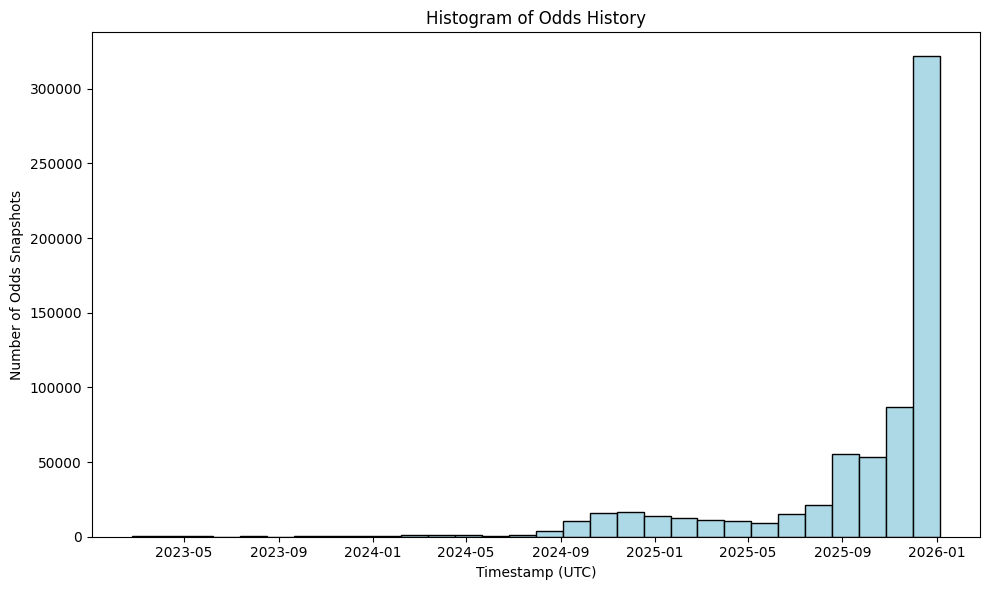

In [22]:
odds_history_plot = odds_history['timestamp'].to_pandas()

plt.figure(figsize=(10, 6))
plt.hist(odds_history_plot, bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Timestamp (UTC)')
plt.ylabel('Number of Odds Snapshots')
plt.title('Histogram of Odds History')
plt.tight_layout()
plt.show()

This histogram of odds data from Polymarket in conjunction with the histogram of events data from StatsBomb are my primary reason for pivoting away from the original research question. 

There is a clear information gap between the events captured in the StatsBomb data and the odds history from Polymarket. This discrepancy highlights the need for careful alignment of data sources when analyzing player performance and market behavior. 

The next step in the EDA process will be to reframe the research question. 

# Revised EDA with New Research Question

Considering the low overlap in StatsBomb and Polymarket data, the revised analysis will focus on 